In [198]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from collections import Counter

In [199]:
def checkIfConstant(str):
    for i in range(1,len(str)):
        if str[i-1] != str[i]:
            return False
    return True

def checkIfBalanced(str):
    c = Counter(str)
    assert len(c.keys()) == 2
    test_val = list(c.values())[0]
    return all([val == test_val for val in c.values()])
    

In [200]:
def constructU(str):
    U = np.zeros([32,32], dtype=np.int8)
    for i in range(len(str)):
        if str[i] == '1':
            U[2*i][2*i+1] = 1
            U[2*i+1][2*i] = 1
        else:
            U[2*i][2*i] = 1
            U[2*i+1][2*i+1] = 1
    M = sp.Matrix(U)
    assert M@M.T == sp.Matrix(np.eye(32, dtype=np.int8))
    return U

In [201]:
def Uf(str):
    return None if not (checkIfConstant(str) or checkIfBalanced(str)) else constructU(str)

In [202]:
def deustschJozsa(Uf, wires = list(range(0,5))):
    qml.X(wires=wires[-1])
    [qml.Hadamard(wires=wire) for wire in wires]
    qml.QubitUnitary(Uf, wires=wires)
    [qml.Hadamard(wires=wire) for wire in wires[:-1]]
    return qml.probs(wires=wires[:-1])

dev = qml.device("default.qubit", wires=12)
alg = qml.QNode(deustschJozsa, dev)

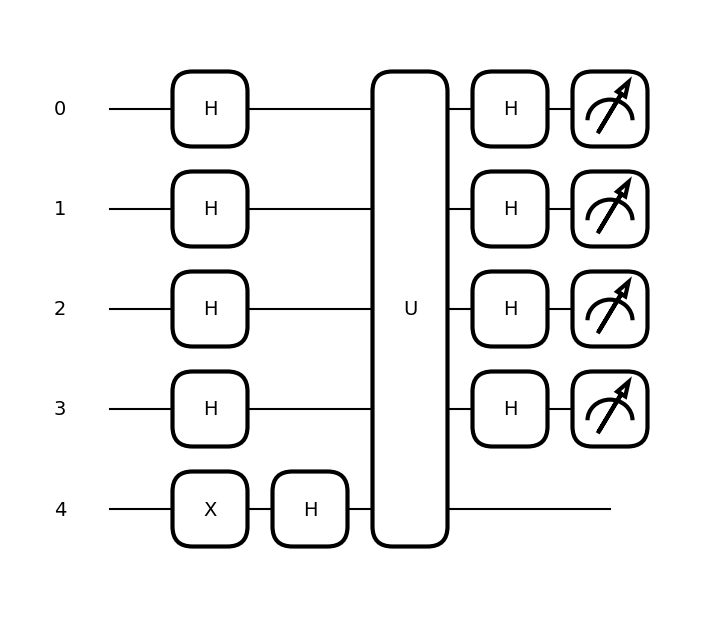

In [203]:
fig, ax = qml.draw_mpl(alg)(Uf("1111000011110000"))
plt.show()

In [218]:
alg(Uf("1111000011110000"))
# alg(Uf("0000000000000000"))
# alg(Uf("1111111111111111"))

tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)